In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [99]:
df = pd.read_csv('sorted_file.csv')

In [100]:
df.head()

Reviews  Ratings Processed_Date
0  Nov, 2020      5.0     2020-11-01
1  Nov, 2020      5.0     2020-11-01
2  Nov, 2020      5.0     2020-11-01
3  Nov, 2020      5.0     2020-11-01
4  Nov, 2020      5.0     2020-11-01

In [101]:
dates = pd.to_datetime(df['Processed_Date'])
ratings = df['Reviews']


In [102]:
df['Processed_Date'] = pd.to_datetime(df['Processed_Date'])

In [103]:
df

Reviews  Ratings Processed_Date
0       Nov, 2020      5.0     2020-11-01
1       Nov, 2020      5.0     2020-11-01
2       Nov, 2020      5.0     2020-11-01
3       Nov, 2020      5.0     2020-11-01
4       Nov, 2020      5.0     2020-11-01
...           ...      ...            ...
4483  1 month ago      5.0     2023-08-01
4484    1 day ago      5.0     2023-08-01
4485  1 month ago      5.0     2023-08-01
4486  1 month ago      5.0     2023-08-01
4487  1 month ago      3.0     2023-08-01

[4488 rows x 3 columns]

In [104]:
df_aggregated = df.groupby(['Processed_Date', 'Ratings']).size().unstack(fill_value=0).reset_index()

In [105]:
df_aggregated

Ratings Processed_Date  1.0  2.0  3.0  4.0   5.0
0           2020-11-01    0    0    0    1    12
1           2020-12-01    1    0    1    1    13
2           2021-01-01    0    0    0    0     7
3           2021-02-01    0    0    0    2    12
4           2021-03-01    0    0    0    0    12
5           2021-04-01    0    1    1    4    19
6           2021-05-01    0    0    0    2    11
7           2021-06-01    1    0    3    2     9
8           2021-07-01    0    0    1    3    22
9           2021-08-01    3    0    3    7    55
10          2021-09-01    5    2    2    9    53
11          2021-10-01   40   15   54  206  1741
12          2021-11-01   12    4   22  114   611
13          2021-12-01   12    4   13   61   284
14          2022-01-01   14    8    6   53   308
15          2022-02-01    4    1    5    8    92
16          2022-03-01    3    1    2   10    70
17          2022-04-01    0    3    1    5    36
18          2022-05-01    3    0    0   10    60
19          2022-06-01    2    1    0    2    28
20          2022-07-01    2    1    2    9    53
21          2022-08-01    3    0    3    9    57
22          2022-09-01    0    0    0    0     5
23          2022-10-01    0    0    1    3    25
24          2022-11-01    0    0    0    2     9
25          2022-12-01    1    0    0    0    13
26          2023-01-01    1    0    0    2    13
27          2023-02-01    1    1    1    1    17
28          2023-03-01    0    0    3    1     6
29          2023-04-01    3    0    0    0     8
30          2023-05-01    0    0    0    0     4
31          2023-06-01    0    0    0    0     6
32          2023-07-01    0    0    1    1     5
33          2023-08-01    0    0    1    0     5

In [106]:
# df_aggregated.columns.name = None  # Remove column name
df_aggregated = df_aggregated.rename(columns={1.0: 'Rating_1', 2.0: 'Rating_2', 3.0: 'Rating_3', 4.0: 'Rating_4', 5.0: 'Rating_5'})

In [107]:
df_aggregated

Ratings Processed_Date  Rating_1  Rating_2  Rating_3  Rating_4  Rating_5
0           2020-11-01         0         0         0         1        12
1           2020-12-01         1         0         1         1        13
2           2021-01-01         0         0         0         0         7
3           2021-02-01         0         0         0         2        12
4           2021-03-01         0         0         0         0        12
5           2021-04-01         0         1         1         4        19
6           2021-05-01         0         0         0         2        11
7           2021-06-01         1         0         3         2         9
8           2021-07-01         0         0         1         3        22
9           2021-08-01         3         0         3         7        55
10          2021-09-01         5         2         2         9        53
11          2021-10-01        40        15        54       206      1741
12          2021-11-01        12         4        22       114       611
13          2021-12-01        12         4        13        61       284
14          2022-01-01        14         8         6        53       308
15          2022-02-01         4         1         5         8        92
16          2022-03-01         3         1         2        10        70
17          2022-04-01         0         3         1         5        36
18          2022-05-01         3         0         0        10        60
19          2022-06-01         2         1         0         2        28
20          2022-07-01         2         1         2         9        53
21          2022-08-01         3         0         3         9        57
22          2022-09-01         0         0         0         0         5
23          2022-10-01         0         0         1         3        25
24          2022-11-01         0         0         0         2         9
25          2022-12-01         1         0         0         0        13
26          2023-01-01         1         0         0         2        13
27          2023-02-01         1         1         1         1        17
28          2023-03-01         0         0         3         1         6
29          2023-04-01         3         0         0         0         8
30          2023-05-01         0         0         0         0         4
31          2023-06-01         0         0         0         0         6
32          2023-07-01         0         0         1         1         5
33          2023-08-01         0         0         1         0         5

In [108]:
df_aggregated = df_aggregated.drop([11,12,13,14])
df_aggregated.reset_index(drop=True, inplace=True)
df_aggregated['Total Votes'] = df_aggregated[['Rating_1','Rating_2',  'Rating_3', 'Rating_4',  'Rating_5']].sum(axis=1)


In [109]:
df_aggregated

Ratings Processed_Date  Rating_1  Rating_2  Rating_3  Rating_4  Rating_5  \
0           2020-11-01         0         0         0         1        12   
1           2020-12-01         1         0         1         1        13   
2           2021-01-01         0         0         0         0         7   
3           2021-02-01         0         0         0         2        12   
4           2021-03-01         0         0         0         0        12   
5           2021-04-01         0         1         1         4        19   
6           2021-05-01         0         0         0         2        11   
7           2021-06-01         1         0         3         2         9   
8           2021-07-01         0         0         1         3        22   
9           2021-08-01         3         0         3         7        55   
10          2021-09-01         5         2         2         9        53   
11          2022-02-01         4         1         5         8        92   
12          2022-03-01         3         1         2        10        70   
13          2022-04-01         0         3         1         5        36   
14          2022-05-01         3         0         0        10        60   
15          2022-06-01         2         1         0         2        28   
16          2022-07-01         2         1         2         9        53   
17          2022-08-01         3         0         3         9        57   
18          2022-09-01         0         0         0         0         5   
19          2022-10-01         0         0         1         3        25   
20          2022-11-01         0         0         0         2         9   
21          2022-12-01         1         0         0         0        13   
22          2023-01-01         1         0         0         2        13   
23          2023-02-01         1         1         1         1        17   
24          2023-03-01         0         0         3         1         6   
25          2023-04-01         3         0         0         0         8   
26          2023-05-01         0         0         0         0         4   
27          2023-06-01         0         0         0         0         6   
28          2023-07-01         0         0         1         1         5   
29          2023-08-01         0         0         1         0         5   

Ratings  Total Votes  
0                 13  
1                 16  
2                  7  
3                 14  
4                 12  
5                 25  
6                 13  
7                 15  
8                 26  
9                 68  
10                71  
11               110  
12                86  
13                45  
14                73  
15                33  
16                67  
17                72  
18                 5  
19                29  
20                11  
21                14  
22                16  
23                21  
24                10  
25                11  
26                 4  
27                 6  
28                 7  
29                 6

In [110]:
df_aggregated['Average Rating'] = None
df_aggregated['Color'] = None
for index, row in df_aggregated.iterrows():

    rating_weight = 0.0
    for rating in (['Rating_1','Rating_2',  'Rating_3', 'Rating_4',  'Rating_5']):
        rating_weight += float(rating[7:])*row[rating]
    df_aggregated.at[index,'Color'] = 1
    if row['Total Votes'] != 0:
        df_aggregated.at[index, 'Average Rating'] = rating_weight / row['Total Votes']
    else:
        df_aggregated.at[index, 'Average Rating'] = 0.0



In [111]:
df_aggregated

Ratings Processed_Date  Rating_1  Rating_2  Rating_3  Rating_4  Rating_5  \
0           2020-11-01         0         0         0         1        12   
1           2020-12-01         1         0         1         1        13   
2           2021-01-01         0         0         0         0         7   
3           2021-02-01         0         0         0         2        12   
4           2021-03-01         0         0         0         0        12   
5           2021-04-01         0         1         1         4        19   
6           2021-05-01         0         0         0         2        11   
7           2021-06-01         1         0         3         2         9   
8           2021-07-01         0         0         1         3        22   
9           2021-08-01         3         0         3         7        55   
10          2021-09-01         5         2         2         9        53   
11          2022-02-01         4         1         5         8        92   
12          2022-03-01         3         1         2        10        70   
13          2022-04-01         0         3         1         5        36   
14          2022-05-01         3         0         0        10        60   
15          2022-06-01         2         1         0         2        28   
16          2022-07-01         2         1         2         9        53   
17          2022-08-01         3         0         3         9        57   
18          2022-09-01         0         0         0         0         5   
19          2022-10-01         0         0         1         3        25   
20          2022-11-01         0         0         0         2         9   
21          2022-12-01         1         0         0         0        13   
22          2023-01-01         1         0         0         2        13   
23          2023-02-01         1         1         1         1        17   
24          2023-03-01         0         0         3         1         6   
25          2023-04-01         3         0         0         0         8   
26          2023-05-01         0         0         0         0         4   
27          2023-06-01         0         0         0         0         6   
28          2023-07-01         0         0         1         1         5   
29          2023-08-01         0         0         1         0         5   

Ratings  Total Votes Average Rating Color  
0                 13       4.923077     1  
1                 16         4.5625     1  
2                  7            5.0     1  
3                 14       4.857143     1  
4                 12            5.0     1  
5                 25           4.64     1  
6                 13       4.846154     1  
7                 15            4.2     1  
8                 26       4.807692     1  
9                 68       4.632353     1  
10                71       4.450704     1  
11               110       4.663636     1  
12                86       4.662791     1  
13                45       4.644444     1  
14                73        4.69863     1  
15                33       4.606061     1  
16                67       4.641791     1  
17                72          4.625     1  
18                 5            5.0     1  
19                29       4.827586     1  
20                11       4.818182     1  
21                14       4.714286     1  
22                16          4.625     1  
23                21        4.52381     1  
24                10            4.3     1  
25                11       3.909091     1  
26                 4            5.0     1  
27                 6            5.0     1  
28                 7       4.571429     1  
29                 6       4.666667     1

In [112]:
#-----------------------------------------LoR------------------------------------------------  


# Oct-22 to Feb23 Total Votes
df_aggregated['Y'] = None
for index, row in df_aggregated.iterrows():
    df_aggregated.at[index,'Y'] = (index+1)*-1*1.100 + 21.50

# FEB-23 to Aug-23 TOTAL VOTES
df_aggregated['Y1'] = None
for index, row in df_aggregated.iterrows():
    df_aggregated.at[index,'Y1'] = (index+1)*-1*0.8571 + 10.33

# Average Rating  OCt-22 to April-23
df_aggregated['Y2'] = None
for index, row in df_aggregated.iterrows():
    df_aggregated.at[index,'Y2'] = (index+1)*-1*0.1418 + 5.094

# Average Rating  Apr-22 to Aug-23
df_aggregated['Y3'] = None
for index, row in df_aggregated.iterrows():
    df_aggregated.at[index,'Y3'] = (index+1)*-1*0.1700 + 5.200



In [113]:
# Creating 'Total Votes' column
df_aggregated['Total Votes2'] = df_aggregated['Y'].where(df_aggregated['Processed_Date'] <= '2023-02-01', df_aggregated['Y'])
df_aggregated['Total Votes2'] = df_aggregated['Y'].where(df_aggregated['Processed_Date'] > '2023-02-01', df_aggregated['Y1'])


In [114]:
df_aggregated

Ratings Processed_Date  Rating_1  Rating_2  Rating_3  Rating_4  Rating_5  \
0           2020-11-01         0         0         0         1        12   
1           2020-12-01         1         0         1         1        13   
2           2021-01-01         0         0         0         0         7   
3           2021-02-01         0         0         0         2        12   
4           2021-03-01         0         0         0         0        12   
5           2021-04-01         0         1         1         4        19   
6           2021-05-01         0         0         0         2        11   
7           2021-06-01         1         0         3         2         9   
8           2021-07-01         0         0         1         3        22   
9           2021-08-01         3         0         3         7        55   
10          2021-09-01         5         2         2         9        53   
11          2022-02-01         4         1         5         8        92   
12          2022-03-01         3         1         2        10        70   
13          2022-04-01         0         3         1         5        36   
14          2022-05-01         3         0         0        10        60   
15          2022-06-01         2         1         0         2        28   
16          2022-07-01         2         1         2         9        53   
17          2022-08-01         3         0         3         9        57   
18          2022-09-01         0         0         0         0         5   
19          2022-10-01         0         0         1         3        25   
20          2022-11-01         0         0         0         2         9   
21          2022-12-01         1         0         0         0        13   
22          2023-01-01         1         0         0         2        13   
23          2023-02-01         1         1         1         1        17   
24          2023-03-01         0         0         3         1         6   
25          2023-04-01         3         0         0         0         8   
26          2023-05-01         0         0         0         0         4   
27          2023-06-01         0         0         0         0         6   
28          2023-07-01         0         0         1         1         5   
29          2023-08-01         0         0         1         0         5   

Ratings  Total Votes Average Rating Color     Y       Y1      Y2    Y3  \
0                 13       4.923077     1  20.4   9.4729  4.9522  5.03   
1                 16         4.5625     1  19.3   8.6158  4.8104  4.86   
2                  7            5.0     1  18.2   7.7587  4.6686  4.69   
3                 14       4.857143     1  17.1   6.9016  4.5268  4.52   
4                 12            5.0     1  16.0   6.0445   4.385  4.35   
5                 25           4.64     1  14.9   5.1874  4.2432  4.18   
6                 13       4.846154     1  13.8   4.3303  4.1014  4.01   
7                 15            4.2     1  12.7   3.4732  3.9596  3.84   
8                 26       4.807692     1  11.6   2.6161  3.8178  3.67   
9                 68       4.632353     1  10.5    1.759   3.676   3.5   
10                71       4.450704     1   9.4   0.9019  3.5342  3.33   
11               110       4.663636     1   8.3   0.0448  3.3924  3.16   
12                86       4.662791     1   7.2  -0.8123  3.2506  2.99   
13                45       4.644444     1   6.1  -1.6694  3.1088  2.82   
14                73        4.69863     1   5.0  -2.5265   2.967  2.65   
15                33       4.606061     1   3.9  -3.3836  2.8252  2.48   
16                67       4.641791     1   2.8  -4.2407  2.6834  2.31   
17                72          4.625     1   1.7  -5.0978  2.5416  2.14   
18                 5            5.0     1   0.6  -5.9549  2.3998  1.97   
19                29       4.827586     1  -0.5   -6.812   2.258   1.8   
20                11       4.818182     1  -1.6  -7.6691  2.1162  1.63   
21             

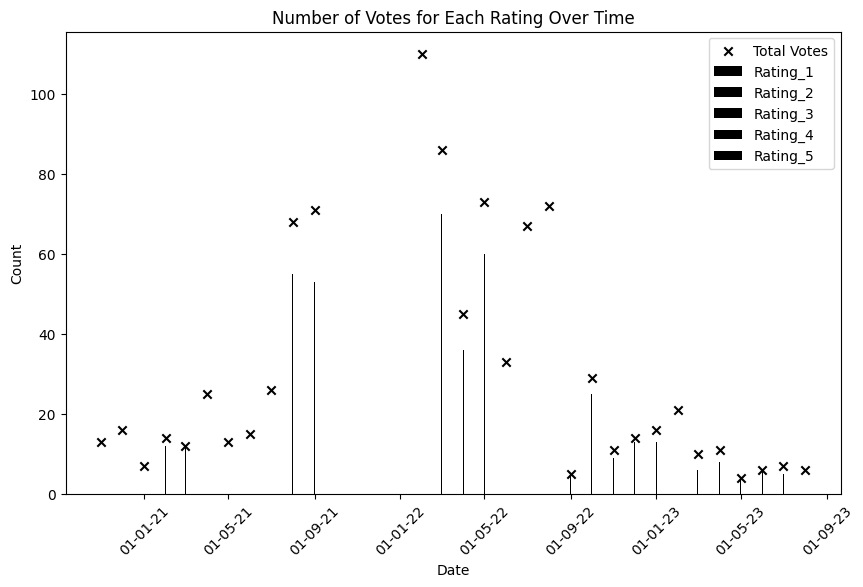

In [74]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime as dt

# Assuming df_aggregated is already defined

# Calculate start_date and end_date
end_date = pd.to_datetime(dt.now())
start_date = pd.to_datetime('2020-10-01')

# Filter DataFrame based on date range
new_df = df_aggregated[(df_aggregated['Processed_Date'] >= start_date) & (df_aggregated['Processed_Date'] <= end_date)]

# Create Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar chart for each rating
for rating_col, color in zip(['Rating_1', 'Rating_2', 'Rating_3', 'Rating_4', 'Rating_5'],["black", "black", "black", "black", "black"]):
    ax.bar(new_df['Processed_Date'], new_df[rating_col], color=color, label=f'{rating_col}')

# Plot Total Votes as markers
ax.scatter(new_df['Processed_Date'], new_df['Total Votes'], c="black", marker="x", label='Total Votes')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Number of Votes for Each Rating Over Time')

# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display legend
ax.legend()

# Show the plot
plt.show()


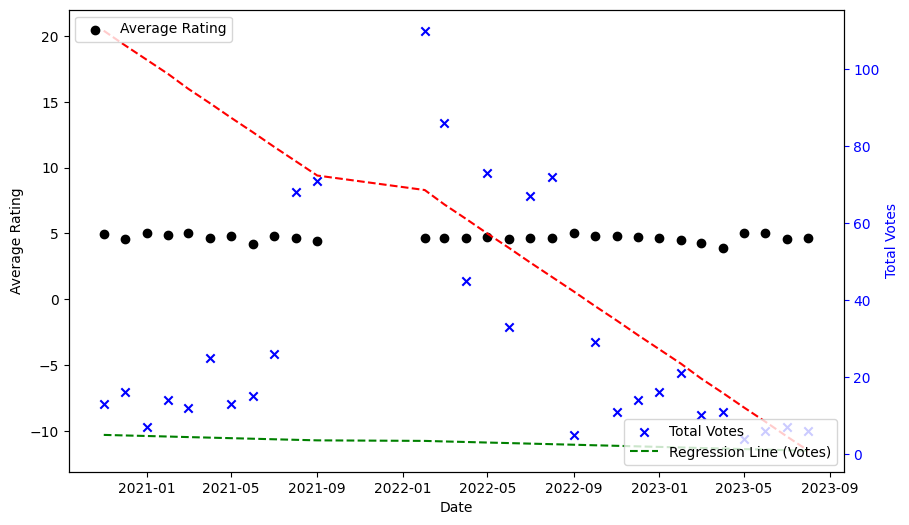

In [76]:
end_date = pd.to_datetime(dt.now())
start_date = pd.to_datetime('2020-10-01')  # Assuming a fixed value of 2 months

# Filter DataFrame based on date range
new_df = df_aggregated[(df_aggregated['Processed_Date'] >= start_date) & (df_aggregated['Processed_Date'] <= end_date)]

# Create subplots with shared x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Average Rating on the first subplot (ax1)
ax1.scatter(new_df['Processed_Date'], new_df['Average Rating'], color='black', marker='o', label='Average Rating')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Rating', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')

# Create a second subplot (ax2) for Total Votes with a shared x-axis
ax2 = ax1.twinx()
ax2.scatter(new_df['Processed_Date'], new_df['Total Votes'], color='blue', marker='x', label='Total Votes')
ax2.set_ylabel('Total Votes', color='blue')
ax2.tick_params('y', colors='blue')
ax2.legend(loc='upper right')

# Add regression lines (assuming 'Y' and 'Y2' are the columns with regression values)
# Uncomment the lines below and adjust as needed
ax1.plot(new_df['Processed_Date'], new_df['Y'], color='red', linestyle='--', label='Regression Line (Rating)')
ax2.plot(new_df['Processed_Date'], new_df['Y2'], color='green', linestyle='--', label='Regression Line (Votes)')

# Add legend to the second subplot
ax2.legend(loc='lower right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()